# Preparation

<b>Load Libraries</b>

In [1]:
# data structures
import numpy as np
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
## settings
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme('notebook')

<b>Load Dataset</b>

In [2]:
# dataset
df_base = pd.read_csv('../../dataset/cleaned/train.csv')
df_base['area_code'] = df_base['area_code'].astype(str)

## dtype columns separation
num_cols = df_base.select_dtypes(np.number).columns.tolist()
cat_cols = df_base.select_dtypes('object').columns.tolist()

<b>Functions</b>

In [3]:
# graph: histogram
def plot_hist(ax, name: str) -> None:
    g = sns.histplot(
        data=df_base, 
        x=name, 
        hue='churn', 
        multiple='stack',
        kde=True,
        ax=ax
    )
    g.axes.lines[0].set_color('r'); g.axes.lines[1].set_color('r')
    g.set_ylabel(None)

In [4]:
# graph: boxen
def plot_boxen(ax, name: str) -> None:
    g = sns.boxenplot(
        data=df_base, 
        x=name, 
        hue='churn',
        ax=ax
    )

In [5]:
# graph: qq
def plot_qq(ax, name: str) -> None:
    churn = ['no', 'yes']

    for i in range(2):
        mask = df_base['churn'] == churn[i]
        data = df_base[mask]
        pp = sm.ProbPlot(
            data=data[name], 
            fit=True
        )
        g = pp.qqplot(
            marker='o', markerfacecolor=sns.color_palette()[i], markeredgecolor='none',
            alpha=0.5, 
            ax=ax
        )
        sm.qqline(
            ax=ax, 
            line='45',
            fmt='r'
        )

In [ ]:
# graph: stacked bars


# 1. Univariate Analysis

<b>Quantitive</b>

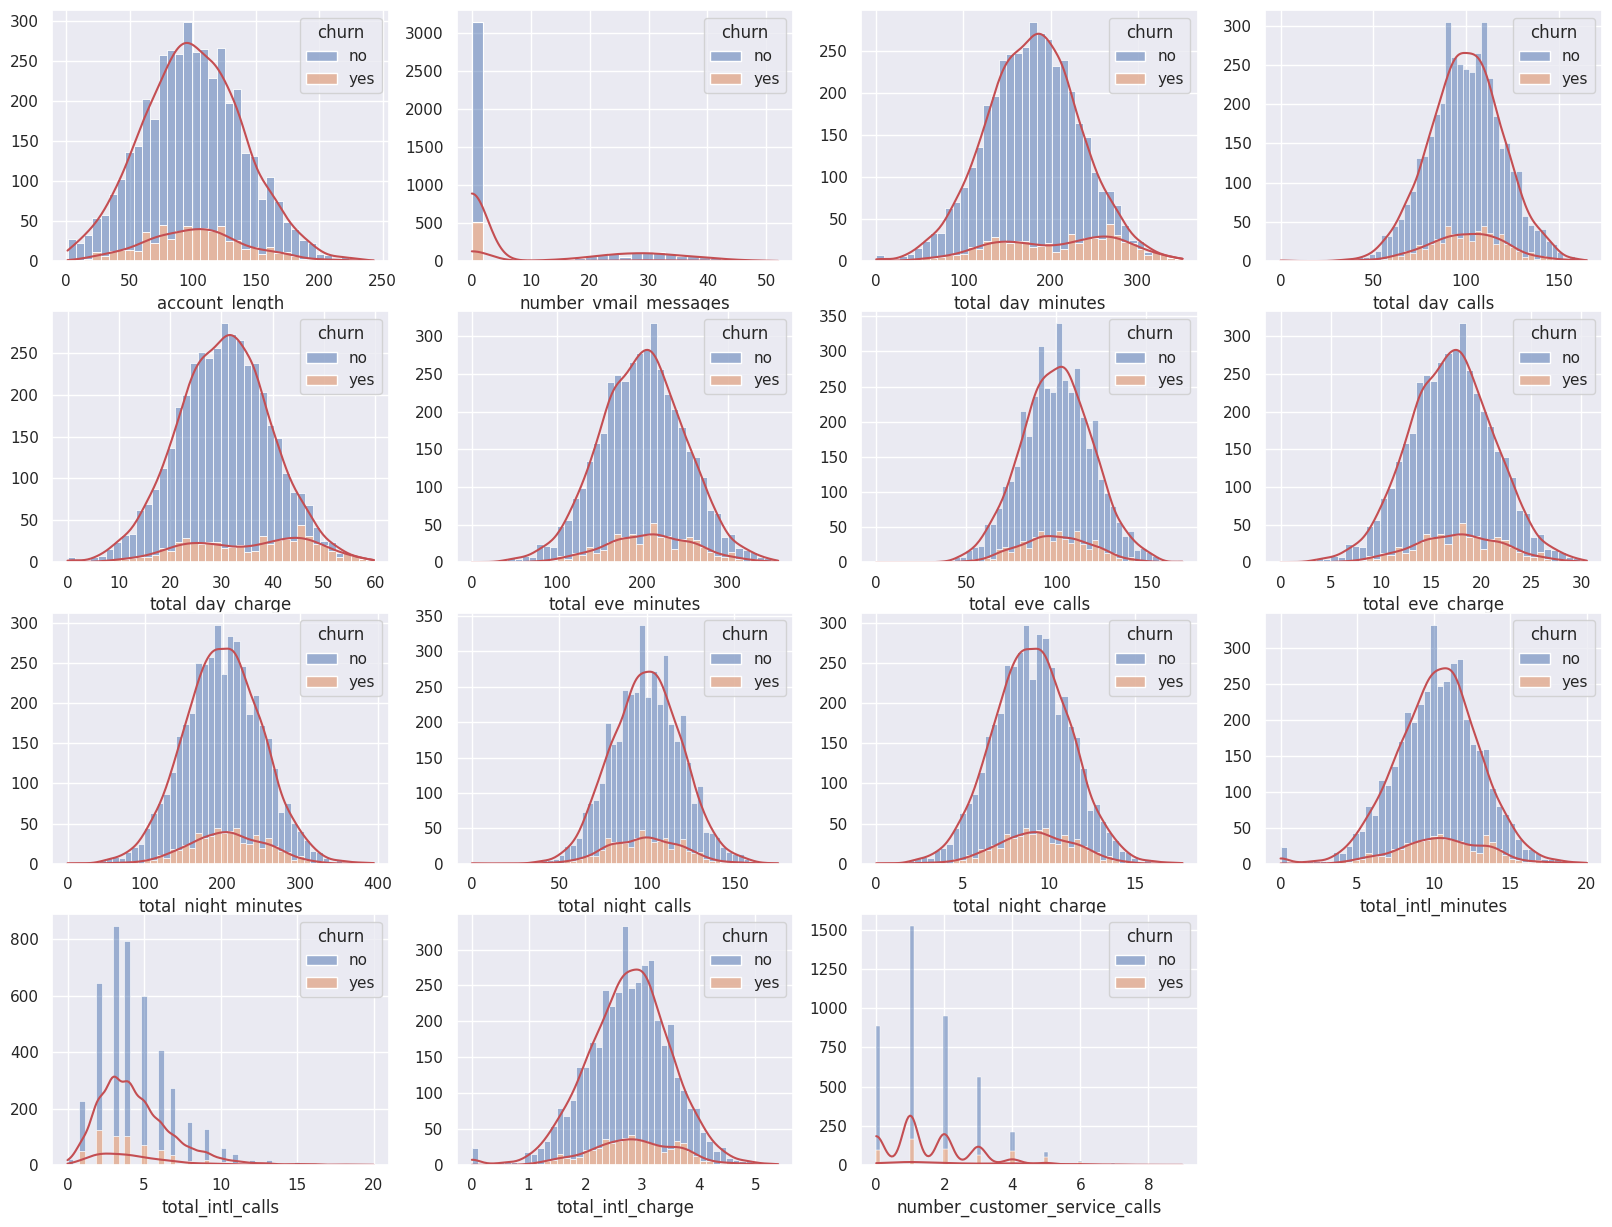

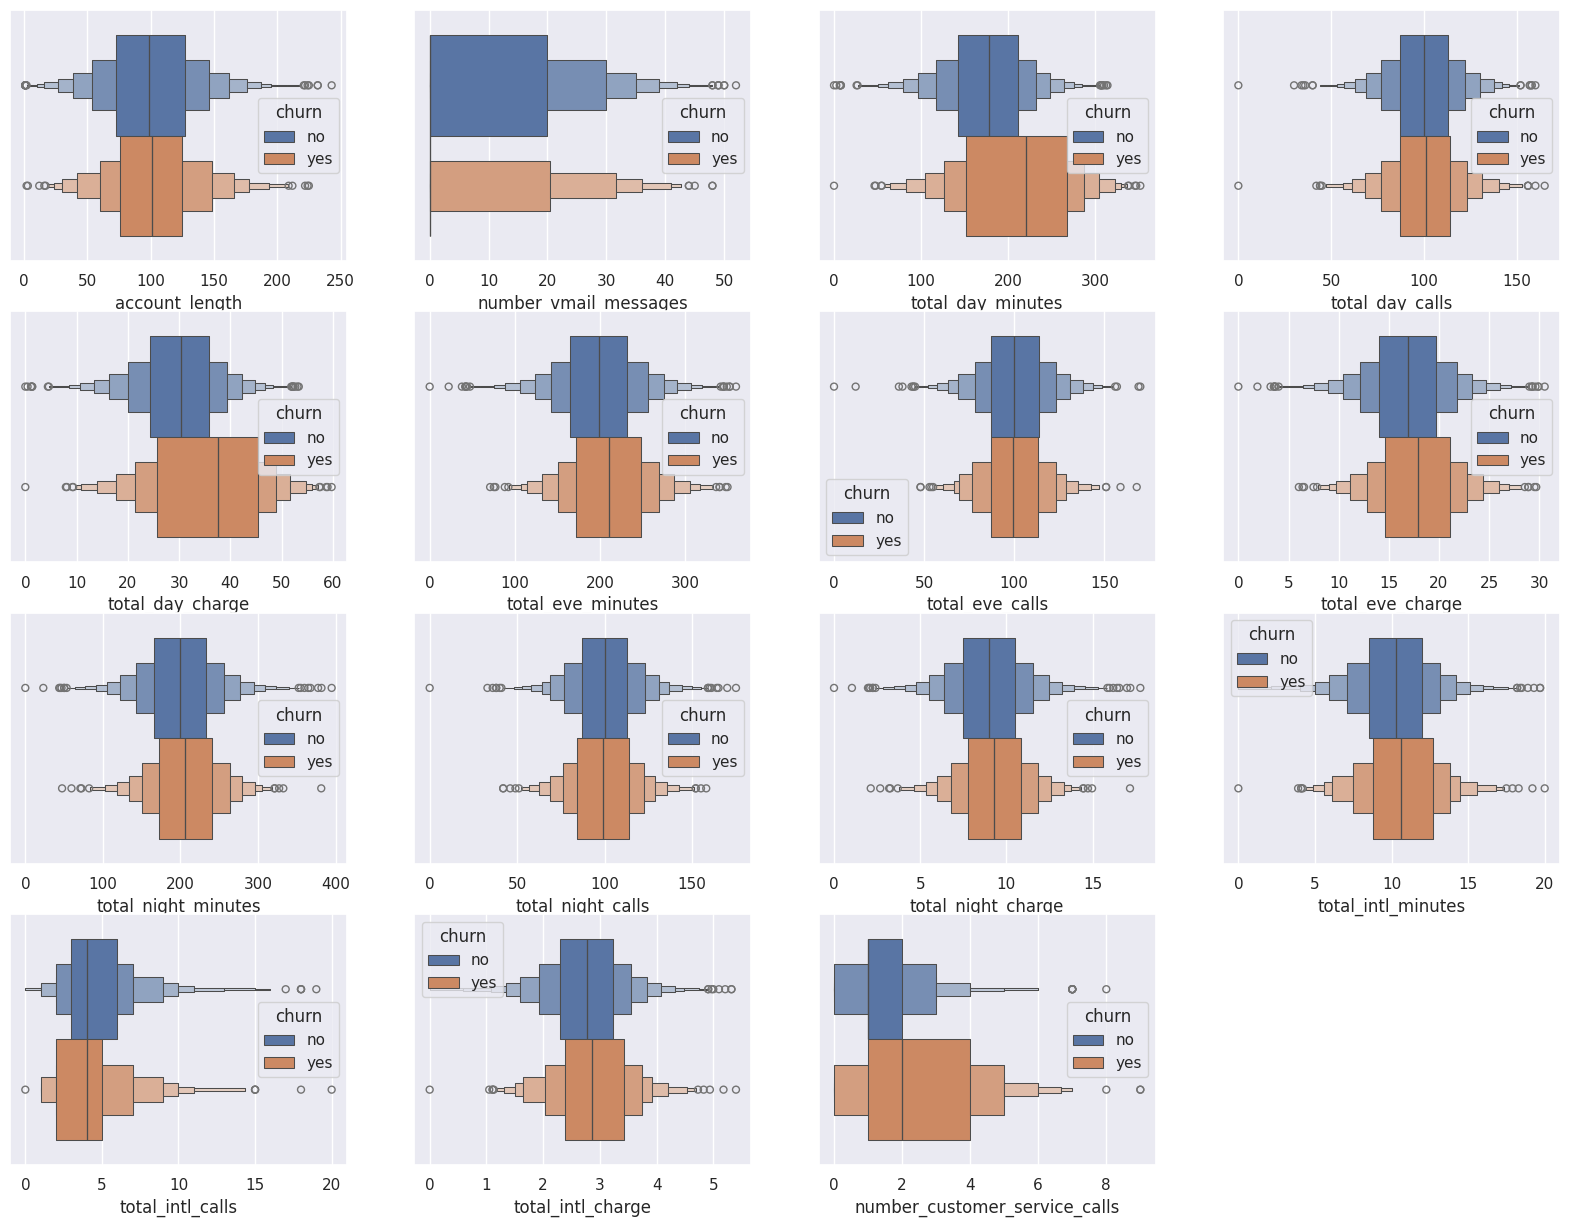

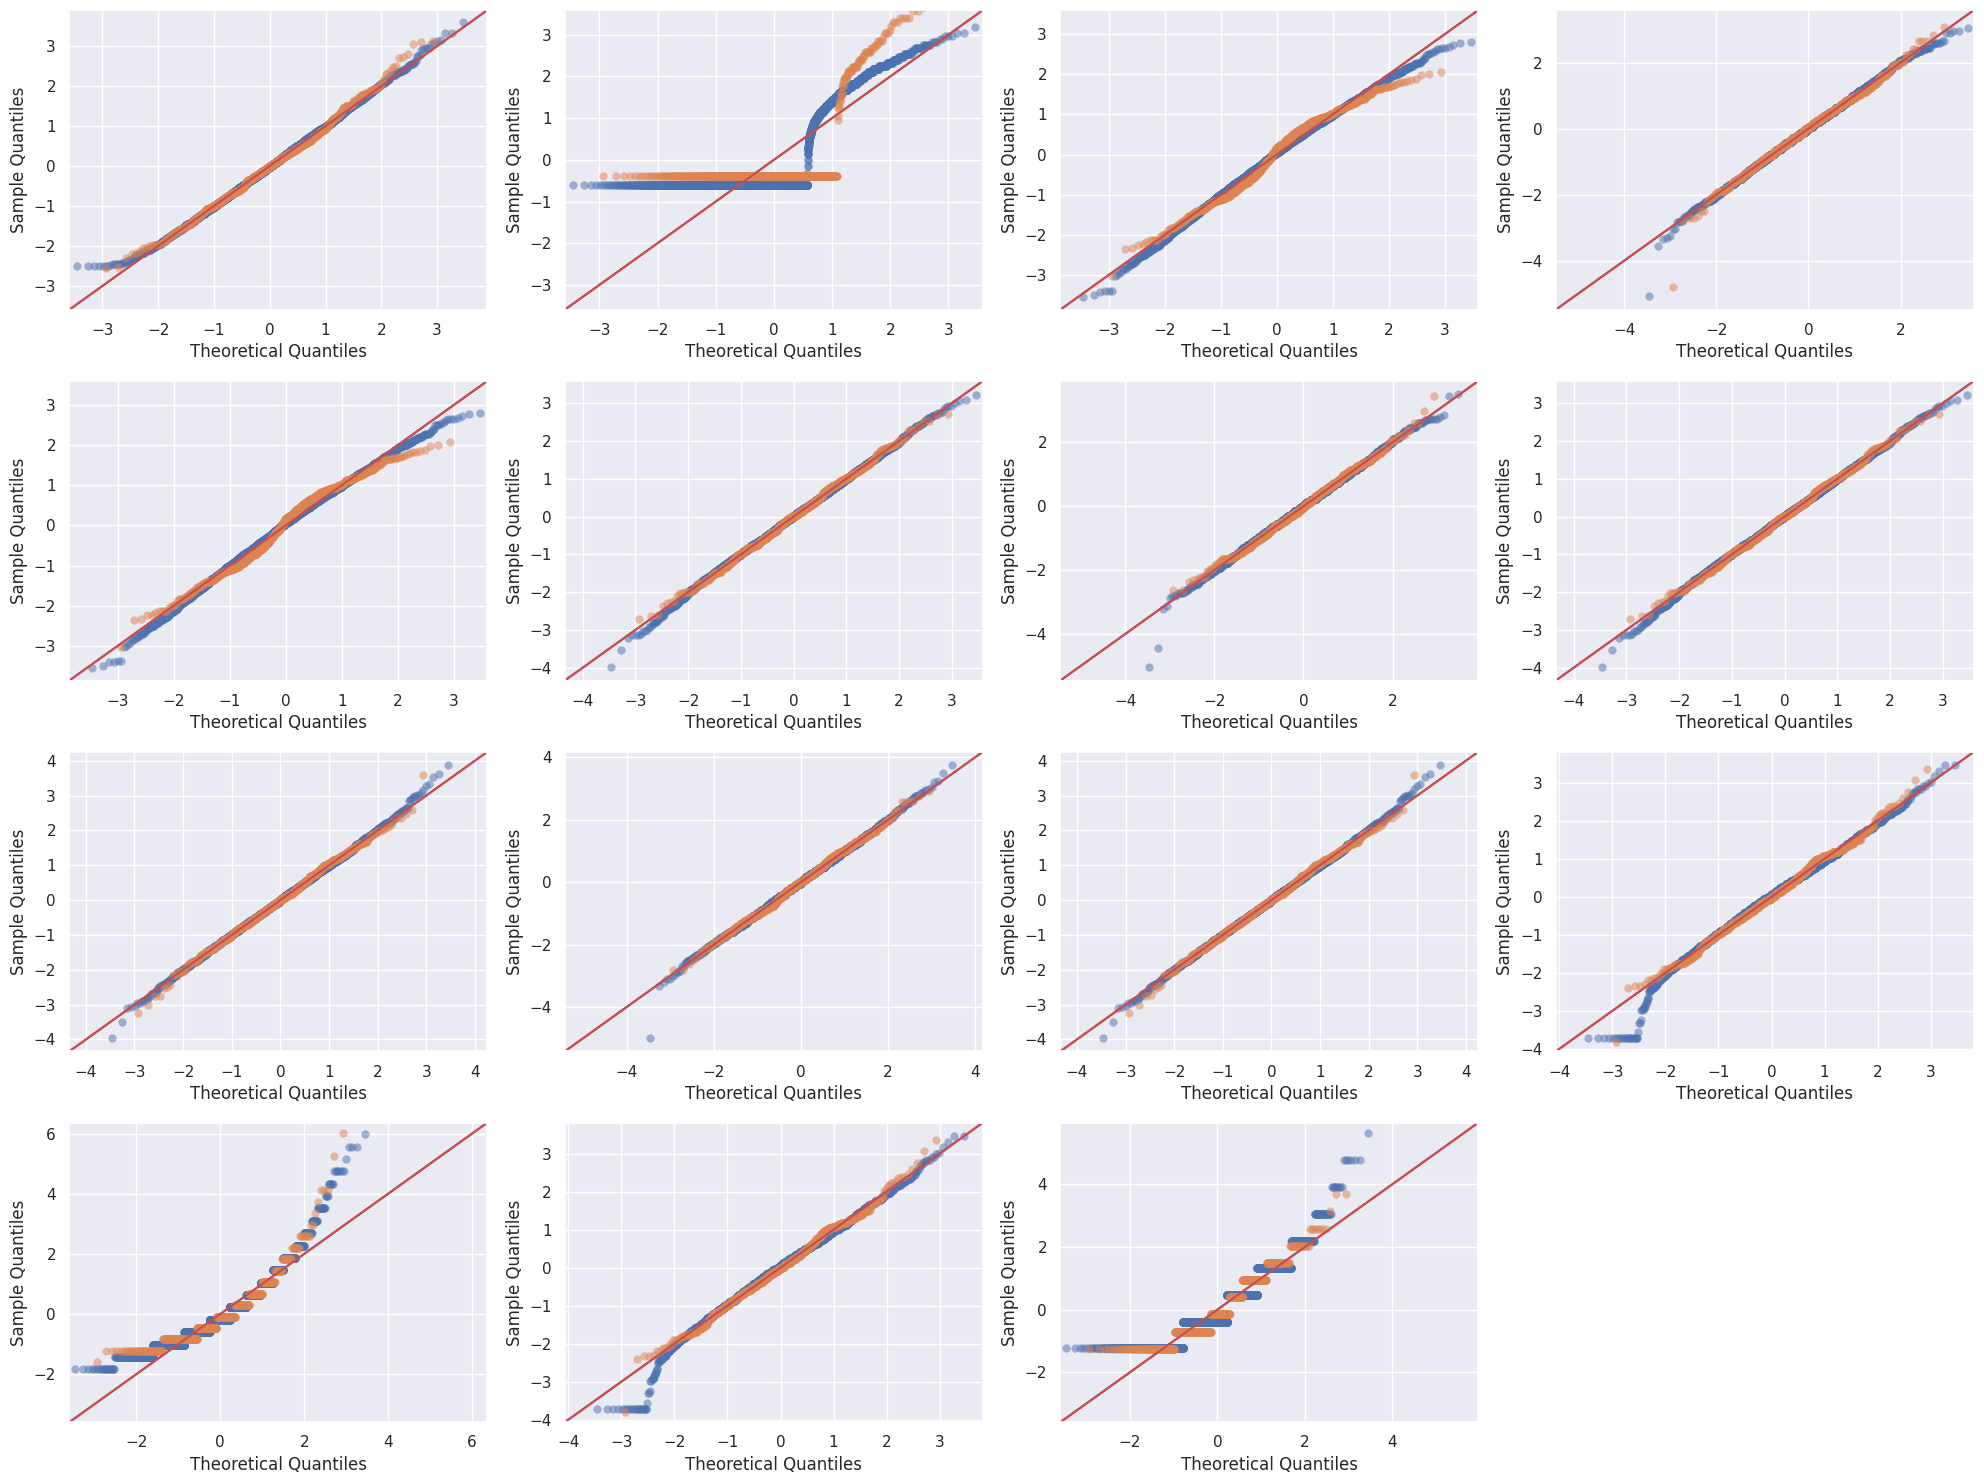

In [6]:
# histogram + boxen + qq
##
axes = dict()
graph_names = ['hist', 'boxen', 'qq']
for name in graph_names:
    fig, sub_axes = plt.subplots(
        nrows=4, ncols=4, 
        sharex=False, sharey=False, 
        figsize=(20, 15)
    )
    
    axes[name] = sub_axes

## 
names = num_cols.copy()
names.append('0')
names = np.array(names).reshape(4, 4)

##
for i in range(4):
    for j in range(4):
        if names[i, j] != '0':
            plot_hist(
                ax=axes['hist'][i, j], 
                name=names[i, j]
            )
            plot_boxen(
                ax=axes['boxen'][i, j], 
                name=names[i, j]
            )
            plot_qq(
                ax=axes['qq'][i, j], 
                name=names[i, j]
            )
        else:
            axes['hist'][i, j].set_visible(False)
            axes['boxen'][i, j].set_visible(False)
            axes['qq'][i, j].set_visible(False)

##
plt.tight_layout()
plt.show()

<b>Qualitative</b>

In [32]:
data = pd.pivot_table(
    data=df_base, 
    index=['state'], columns=['churn'], 
    values='area_code', 
    aggfunc='count'
)

data_to_merge = df_base['state'].value_counts()
data = pd.merge(
    left=data, right=data_to_merge, 
    left_index=True, right_index=True
)
data['Not Churn'] = (data['no'] / data['count'])*100
data['Churned'] = (data['yes'] / data['count'])*100

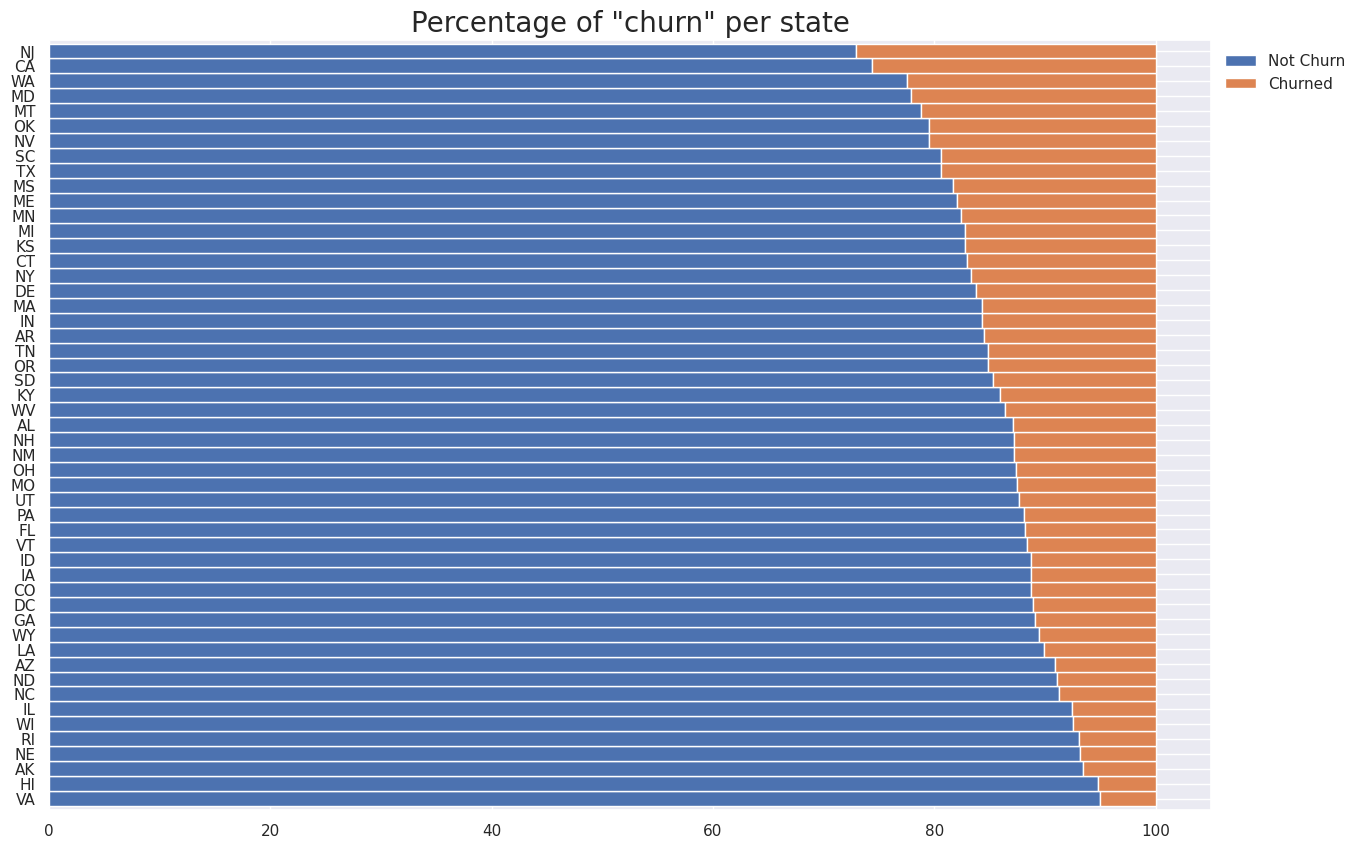

In [63]:
fig, ax = plt.subplots(
    figsize=(15, 10)
)

data[['Not Churn', 'Churned']].sort_values(by='Churned')\
    .plot(
        kind='barh', width=1,
        stacked=True, 
        ax=ax
    )
plt.legend(
    bbox_to_anchor=(1, 1), 
    frameon=False
)
plt.ylabel(None)
plt.title(
    label='Percentage of "churn" per state', 
    fontdict=dict(
        size=20
    )
)
plt.show()

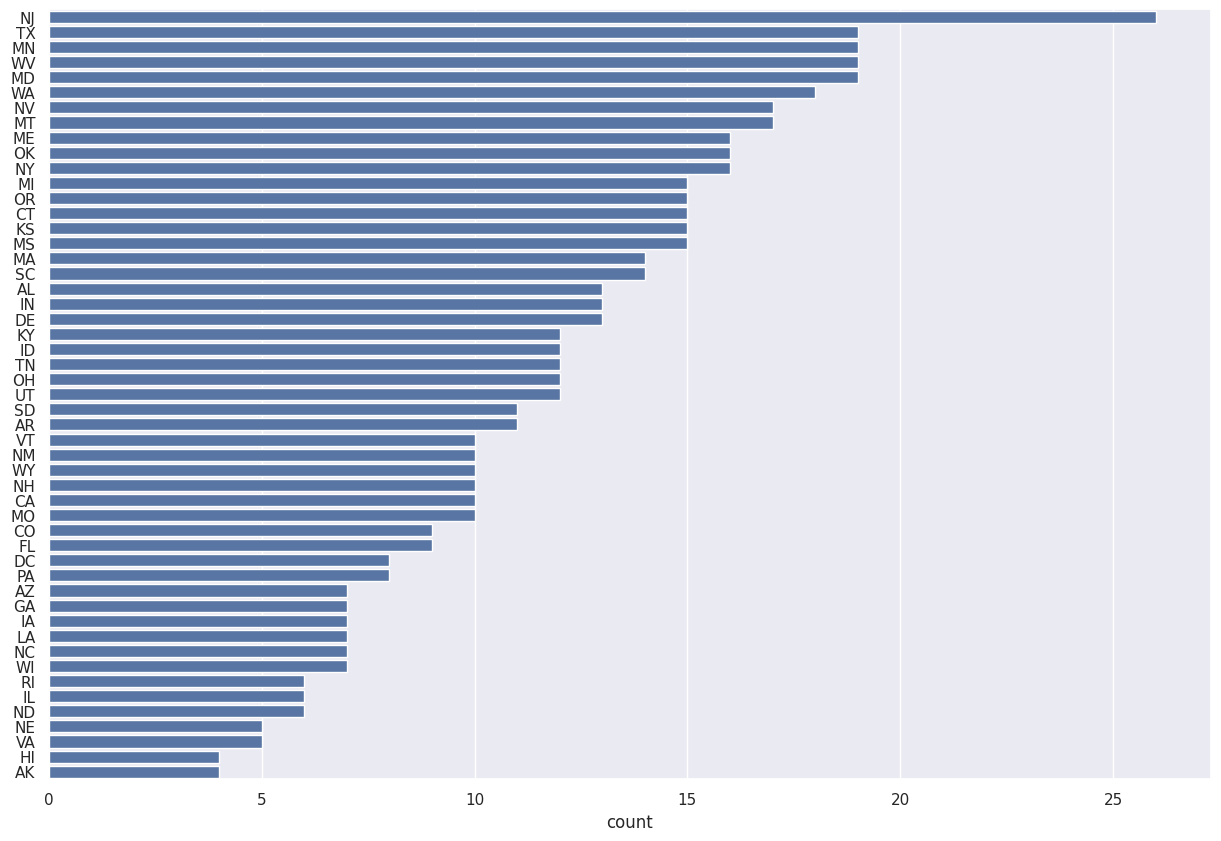

In [73]:
x = data['yes'].copy()\
    .to_frame('count')\
        .sort_values(by='count', ascending=False)
x['percentage(%)'] = (x['count'] / x['count'].sum())*100

fig, ax = plt.subplots(
    figsize=(15, 10)
)

g = sns.barplot(
    data=x, 
    x='count', y='state', 
    ax=ax
)
g.set_ylabel(None)

plt.show()